# Mineração de Dados Espaciais

Fernando Ferraz Ribeiro

Beth Leite Soares

O objetivo deste notebook é juntar dados de um shapefile com um mapa do Open Street Maps(OSM)

## Testando o ambiente de trabalho (conda environment)
Mostrando o caminho que o servidor Jupyter carrega o Python (python.exe) e carregas o anbiente (\envs)

In [1]:
import os
import sys
print(sys.executable)
pathFix = sys.prefix
print(pathFix)

C:\Users\ffrib\AppData\Local\conda\conda\envs\gpd_psycopg2_ox\python.exe
C:\Users\ffrib\AppData\Local\conda\conda\envs\gpd_psycopg2_ox


## Lidando com erros do ambiente (WINDOWS ONLY)
Algumas bibliotecas importadas apresentam um erro apendas na plataforma Windows.

Caso esteja rodando no windos e tenha problemas com o sistema de coordenadas de referência (crs), rode a linha de comando abaixo:


In [2]:
pathFix = pathFix .replace('\\', '/')
print(pathFix)
os.environ["PROJ_LIB"] =   pathFix + "/Library/share"

C:/Users/ffrib/AppData/Local/conda/conda/envs/gpd_psycopg2_ox



mais informações no [Post sobre o Erro](https://github.com/geopandas/geopandas/issues/830)

## Importando Bibliotecas

In [3]:
# Biblioteca basica de programação científica em python
import numpy as np
# biblioteca de análise de dados
import pandas as pd
# biblioteca de gráficos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# Bibliotecas geopandas
import geopandas as gpd
# biblioteca de redes complexas
import networkx as nx
# biblioteca para acessar dados do Open sreet maps
import osmnx as ox
# ler dados remotamente da internet
import requests
# Biblioteca para leitura e escrita em um DB postergSQL
import psycopg2 as pyql

In [15]:

from sqlalchemy import *
import pandas as pd
import geopandas as gpd
from geoalchemy2 import Geometry, WKTElement


ModuleNotFoundError: No module named 'geoalchemy2'

In [4]:
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

## Criando coordenadas de recorte

In [5]:
# coordenada inicial x
xSC = 555000
# variação da coordenada x
deltaX = 2000
# coordenada inicial y
ySC = 8570000
# variação da coordenada y
deltaY = 2000

## Limites da importaçâo

In [6]:
from shapely.geometry import Polygon

recorte = gpd.GeoSeries([ Polygon([(xSC,ySC), (xSC + deltaX , ySC), (xSC + deltaX, ySC + deltaY ), (xSC, ySC + deltaY )]) ])

A geometria criada pela linha de comando acima, embora tenha as corrdenadas relativas ao sistema de projeção Sigras 2000, não tem nenhuma informação georreferenciada. É preciso informar qual o sistema de coordenadas de referência utilizado ( coordenates reference sistem - crs). O Bloco de código abaxo informa que as coordenadas do recorte devem ser tratadas com o sistema Sigras 2000. com unidades em metro.

In [7]:
# colocando em coordenaadas SIRGAS 2000
recorte.crs = {'proj': 'utm', 'zone': 24, 'south': True, 'ellps': 'aust_SA', 'units': 'm', 'no_defs': True}


## Carregando shapes

In [8]:
# importando Shape dos bairros - polígonos
bairros = gpd.read_file('./shapefiles/BaseSSAConder/Lim/bairros_fim.shp', bbox= recorte )

# importando Shape das edificaçõs - polilinhas
edf = gpd.read_file('./shapefiles/BaseSSAConder/edificacoes_polyline.shp', bbox= recorte)

# importando shape de pontos
edf_pt = gpd.read_file('./shapefiles/BaseSSAConder/edificacoes_point.shp', bbox = recorte)

## Mostrando os dados dos shapes

### dados do shape bairros

In [9]:
bairros.head()

,OBJECTID,BR_,BR_ID,NM_BAIRROS,Shape_Leng,Shape_Area,geometry
0,89,2,1,Lobato,10290.734146,1.508163e+06,"POLYGON ((556643.6323074758 8573040.904571733,..."
1,91,2,1,Massaranduba,5027.152427,5.301521e+05,"POLYGON ((555124.2668471506 8570956.484697679,..."
2,92,2,1,Santa Luzia,5579.648112,3.957189e+05,"POLYGON ((556131.141931782 8571133.633667247, ..."
3,98,2,1,Alto do Cabrito,5031.429303,1.112943e+06,"POLYGON ((557394.0547874847 8572993.633136973,..."
4,99,2,1,Capelinha,3337.251376,4.201418e+05,"POLYGON ((556500.9559292701 8570974.556498181,..."


### Dados do shape edificacoes

In [10]:
edf.head()

,ID,geometry
0,357236,LINESTRING (555000.0316226622 8570905.59166144...
1,357238,LINESTRING (554999.0173801129 8570926.86740669...
2,357239,LINESTRING (555000.4686540046 8570930.90659893...
3,357240,LINESTRING (555002.9094328225 8570934.45588914...
4,357241,LINESTRING (555009.4978864561 8570930.67664492...


In [11]:
edf_pt.head()


,ID,geometry
0,367175,(POINT (556360.5184374301 8570865.76962509))
1,367176,(POINT (556360.5184374301 8570865.76962509))
2,367177,(POINT (556360.5184374301 8570865.76962509))
3,367178,(POINT (556497.9771634268 8571237.37531103))
4,367179,(POINT (556360.5184374301 8570865.76962509))


## Plotando imagens

### limites do recorte

AttributeError: Unknown property axis_off

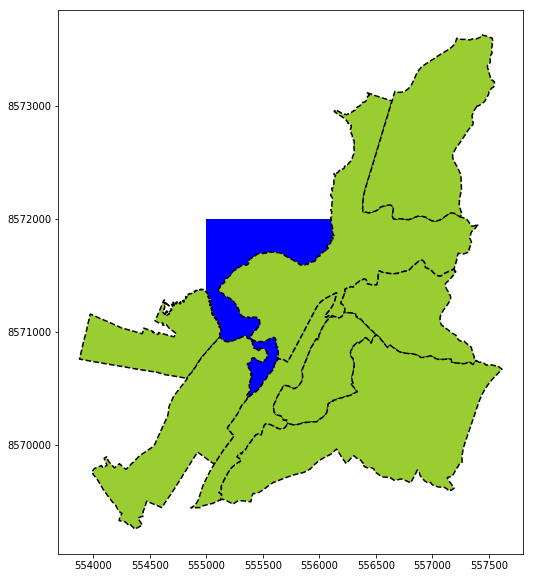

In [12]:
fig, layers = plt.subplots(figsize=(10,10)
                            #,dpi=30
                           )
# pltando a imagem de fundo
recorte.plot(ax = layers, color = 'blue', alpha = 1)
# Plotando os bairros

# layers - quadro o qual poderá ser alterado os valores de xmin, xmax, título e etc

# Plotando os bairros
bairros.plot(ax= layers, color='yellowgreen', edgecolor='black', linestyle="--", lw= 1.5, alpha=1) 

# Plotando as edificações com a cor vermelha
edf.plot(ax= layers, color='darkred', lw= 0.7, axis_off = False)

try:
    edf_pt.plot(ax= layers, color='orange', lw= 0.7 )
except:
    pass
# titulo da figura
fig.suptitle('Imagem Teste', fontsize=16)

# limites do gráfico
layers.set_xlim(xSC, xSC + deltaX )
layers.set_ylim(ySC,  ySC + deltaY )

#fig.show()

## Lendo Arquivos do banco de dados espaciais online Open Street maps

### Através de arquivo baixado manualmente pelo site

In [ ]:
gFile = ox.graph_from_file('./OSM/map.osm')

In [ ]:
gFile

In [ ]:
fig, ax = ox.plot_graph(gFile)
plt.tight_layout()

### Baixando arquivos por coordenadas limite

O open street maps trabalha com coordenadas WGS84, definidas pelo código epsg 4326. O sistema WGS84 utiliza coordenadas em graus de latitude e longitude.

In [ ]:
recorte.bounds

Para utilizar a mesma geometria limite da utilizada para a importação do Shapefile, é preciso converter o sistema de coordenadas de referência de Sigras 2000 para WGS84.

In [ ]:
recorte_LL = recorte.to_crs({'init': 'epsg:4326'})
recorte_LL.bounds

O elemento de índice 0 da coluna geometry é um polígono da biblioteca shapely.

In [ ]:
 type(recorte_LL.geometry[0])

segundo a [documentação do comando ox.graph_from_polygon](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.core.graph_from_polygon) ele recebe como priméiro parâmetro um polígono ou multi-polígono da biblioteca citada.

O download do multi-grafo depende da conexão com a internet

In [ ]:
gLatLon =  ox.graph_from_polygon(
                                   recorte_LL.geometry[0]
                                 , network_type = 'all_private'
                                 , truncate_by_edge = True
                                 , retain_all = True
                            )

In [ ]:
gLatLon

In [ ]:
ox.plot_graph(ox.project_graph(gLatLon))

### Através do endereço (geocoding)

In [ ]:
gCode = ox.graph_from_place('Salvador, Bahia, Brazil', network_type="drive")

O download do multi-grafo depende da conexão com a internet

In [ ]:
gCode

In [ ]:
ox.plot_graph(ox.project_graph(gCode))

Centralidade é uma medida da importância de um vértice em um grafo. Os critérios de medida da importância variam. Os quatro mais utilizados são:
    1. grau
    2. intermediação
    3. proximidade
    4. vetor próprio
    
O código abaixo calcula a centralidade de proximidade da malha viária da localidade gravada no grafo do OSM

In [ ]:
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(gCode))

O custo computacional do cálculo da centralidade cresce exponencialmente de acordo com o número de vértices do grafo(a execução do código acima pode demorar bastante)

O código abaixo desenha um gráfico mostrando, em escala de cores a varição da medida de centralidade da malha viária. 

In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in gCode.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(gCode, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

## Juntando o arquivo do OSM com o Arquivo SHP

### Trasnformando de Grafo OSM para geopandas Data frame

In [ ]:
osm_pontos, osm_linhas = ox.save_load.graph_to_gdfs(gLatLon)

In [ ]:
osm_linhas.head()

## Sistemas de coordenadas
### trasnformando para o sistema Sigras 2000

In [ ]:
# Mudando o sistema de coordenadas de referência

# Para o Shape de Pontos
osm_pontos.to_crs(bairros.crs, inplace = True)
# Para o Shape de Bairros
osm_linhas.to_crs(bairros.crs, inplace = True)

Odenando as colunas do shape das linhas

In [ ]:
# Ordenando as colunas das linhas para que a coluna de geometria fique por último
osm_linhas_cols = osm_linhas.columns.tolist()
osm_linhas_cols = [x for x in osm_linhas_cols if x != 'geometry']
osm_linhas_cols.append('geometry')
osm_linhas = osm_linhas[osm_linhas_cols]

In [ ]:
osm_linhas.head()

In [ ]:
osm_pontos.head()

### Estatística descritivas do DF osm_linhas

In [ ]:
osm_linhas.describe(include='all')

In [ ]:
fig2, layers2 = plt.subplots(figsize=(10,10)
                            #,dpi=30
                           )

recorte.plot(ax = layers2, color = 'blue', alpha = 1)
# Plotando os bairros
# Limites preto
# alpha - transparência
# layers - quadro o qual poderá ser alterado os valores de xmin, xmax, título e etc


bairros.plot(ax= layers2, color='yellowgreen', edgecolor='black', linestyle="--", lw= 1.5, alpha=1) 

# Plotando as edificações com a cor vermelha
edf.plot(ax= layers2, color='darkred', lw= 0.7)

try:
    edf_pt.plot(ax= layers2, color='orange', lw= 0.7, )
except:
    pass

# importados do OSM
osm_linhas.plot(ax= layers2, color='teal', lw= 0.8, )
osm_pontos.plot(ax= layers2, color='indigo', lw= 0.4, axis_off = False )

# titulo da figura
fig2.suptitle('Imagem Teste', fontsize=16)

# limites do gráfico
layers2.set_xlim(xSC, xSC + deltaX )
layers2.set_ylim(ySC,  ySC + deltaY )


In [ ]:
osm_linhas.dtypes

In [ ]:
osm_linhas.oneway = osm_linhas.oneway.astype(int)
osm_linhas.key = osm_linhas.key.astype(int)
osm_linhas.name = osm_linhas.name.astype(str)
osm_linhas.bridge = osm_linhas.bridge.astype(str)


In [ ]:
osm_select = osm_linhas.filter( items= [ 'name', 'oneway','key','length', 'bridge' ,'geometry' ]) 

In [ ]:
osm_select.to_file('./output/teste01.shp', driver='ESRI Shapefile')